## This is a simple example of creating a spectrogram for an audio file.

In [3]:
from __future__ import print_function, absolute_import, division, unicode_literals, with_statement # Python 2 compatibility

import os
from matplotlib import pyplot as plt
import numpy as np

import sys
from egocom import audio

In [4]:
data_loc = "/mnt/surreal/datasets/EGOCOM/240p/5min_parts/"
fn_dict = {}
for fn in sorted([v for v in os.listdir(data_loc) if v[-4:] == ".MP4"]):
    key = fn[9:23] + fn[32:37] if 'part' in fn else fn[9:21]
    fn_dict[key] = fn_dict[key] + [fn] if key in fn_dict else [fn]

day_1__con_1__part1 ['vid_001__day_1__con_1__person_1_part1.MP4', 'vid_006__day_1__con_1__person_2_part1.MP4', 'vid_011__day_1__con_1__person_3_part1.MP4']


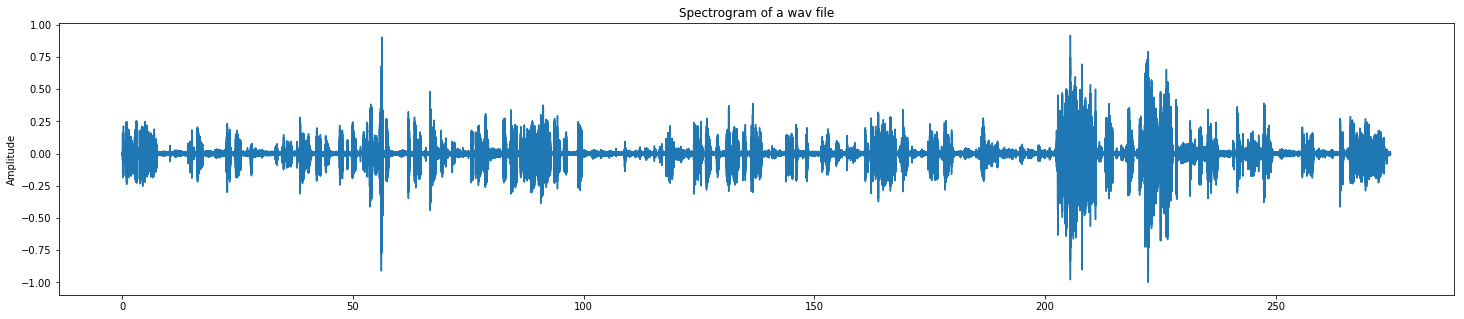

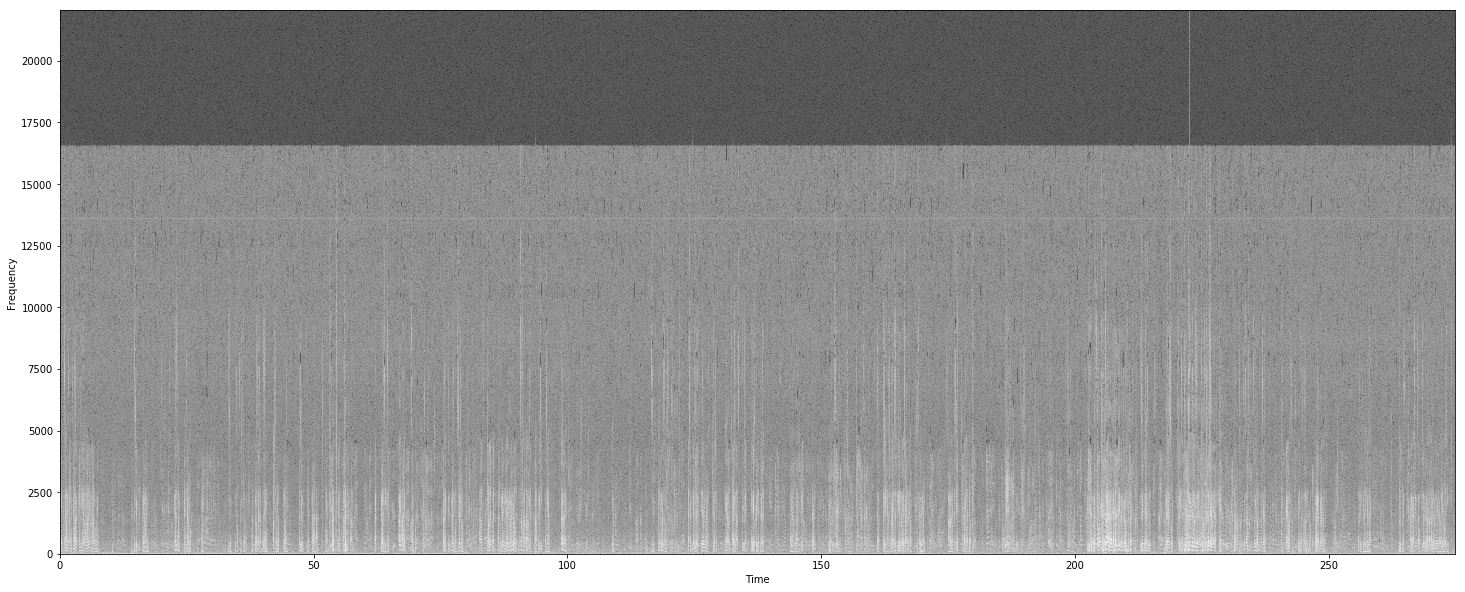

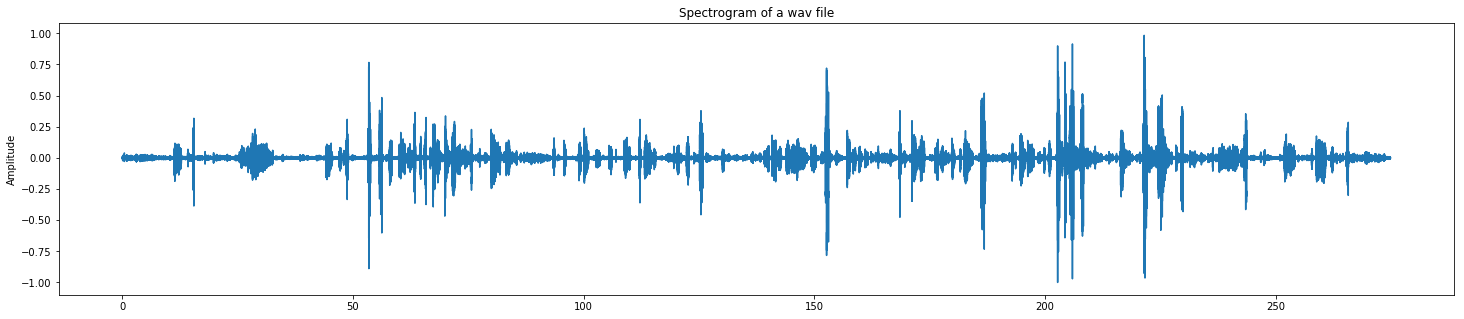

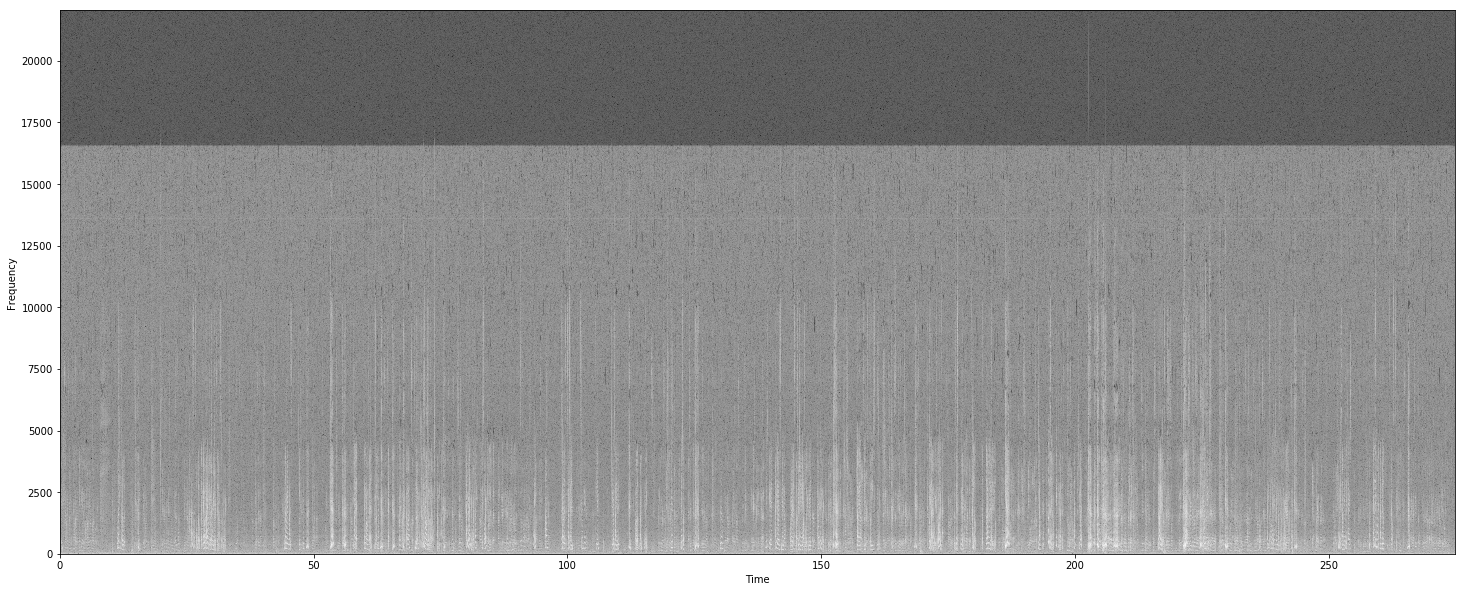

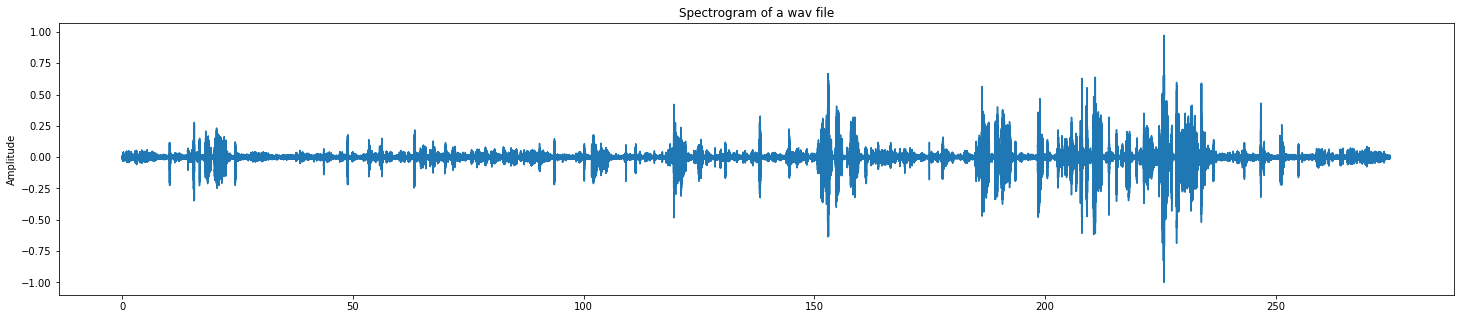

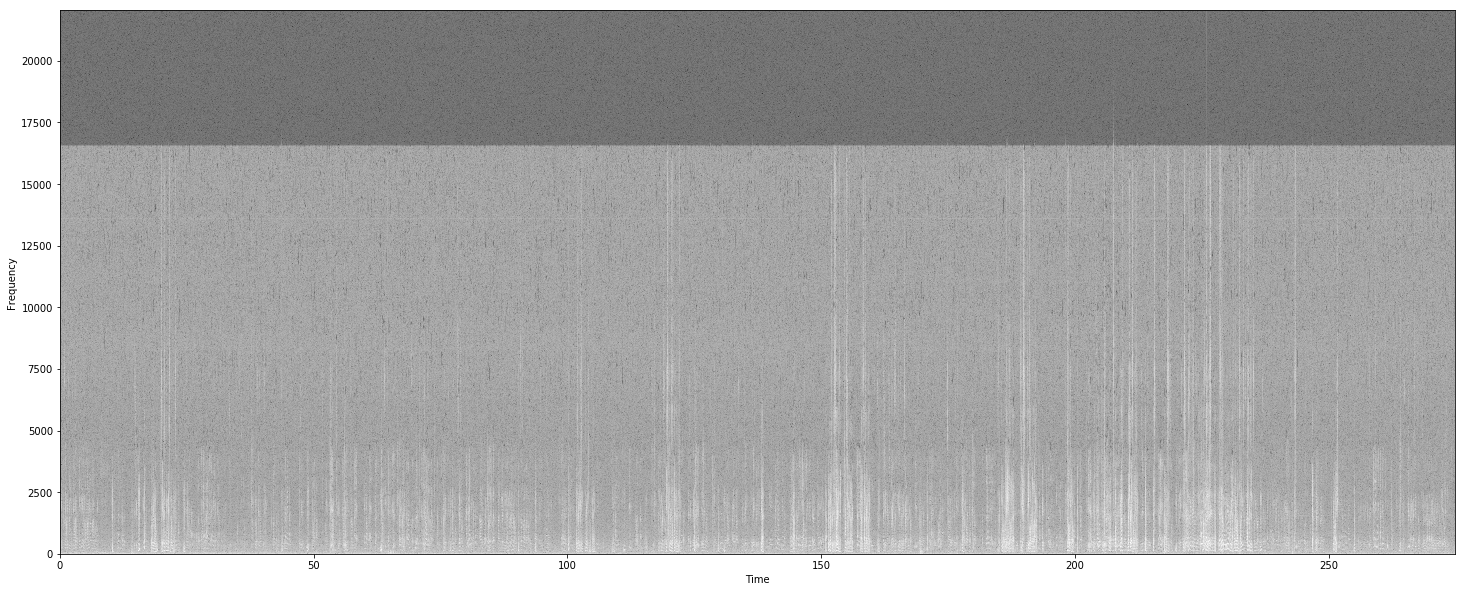

In [5]:
for key in fn_dict.keys():
    print(key, fn_dict[key])
    files = [data_loc + f for f in fn_dict[key]]
    samplerate_list, wav_list = audio.get_samplerate_wav_from_list_of_mp4_fns(files)
    samplerate = samplerate_list[0]
    
    for w in wav_list:
        # samplerate, signalData = wavfile.read(data_loc+'vid_101__day_3__con_1__person_1_pulse.wav')
        wav = audio.norm_center_clip(w.sum(axis=1))

        # Plot the signal read from wav file
        plt.figure(figsize=(25,5))
        plt.title('Spectrogram of a wav file')
        plt.plot(np.arange(len(wav)) / float(samplerate), wav)
        plt.ylabel('Amplitude') 
        plt.show()
        plt.figure(figsize=(25,10))
        spectrum, freqs, times, im = plt.specgram(wav, Fs=samplerate, NFFT = 8192, scale = 'dB', cmap='gray') # scale = 'linear'
        plt.xlabel('Time')
        plt.ylabel('Frequency')
        # plt.xlim(2.5, 4)
        # plt.ylim(950, 1050)
        plt.show()
    
    
    
    break

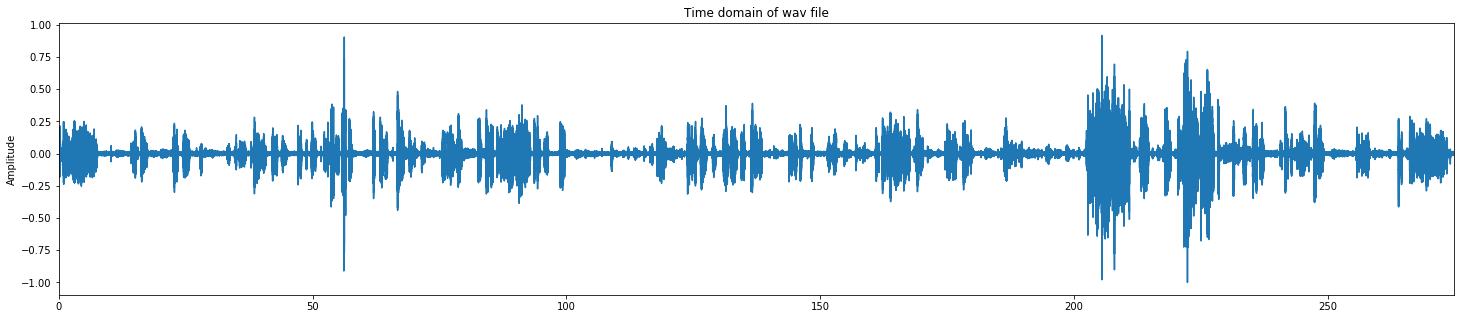

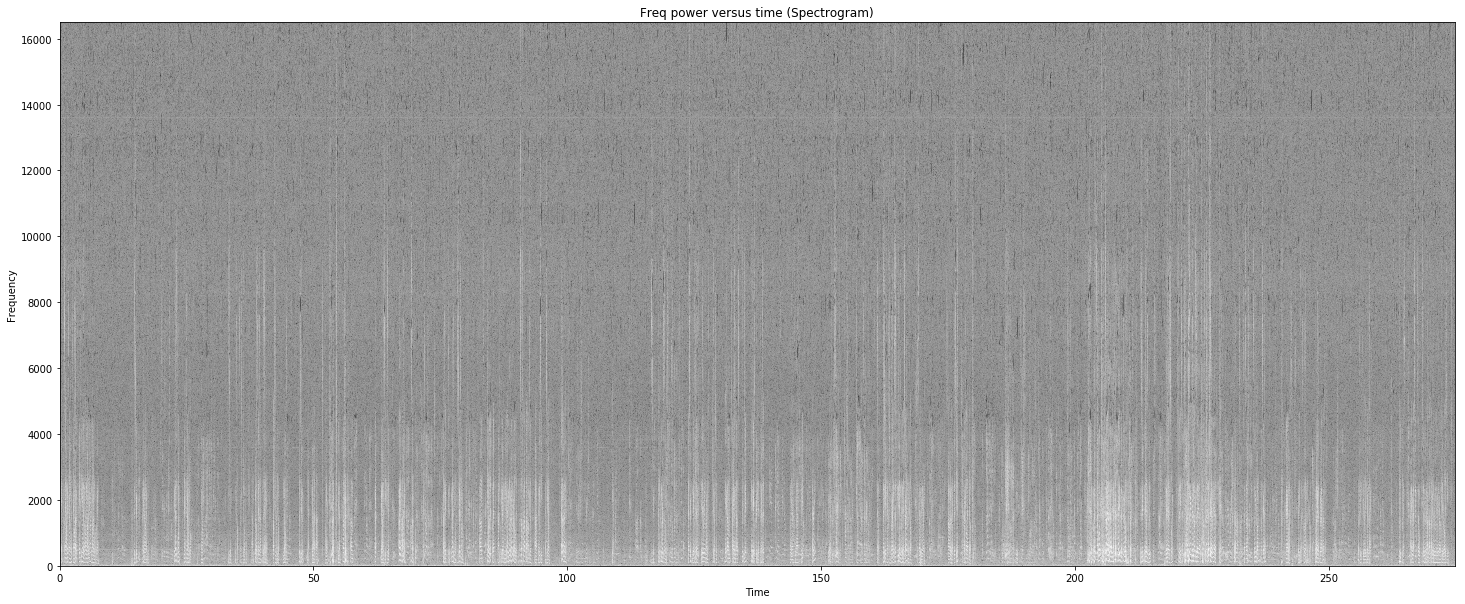

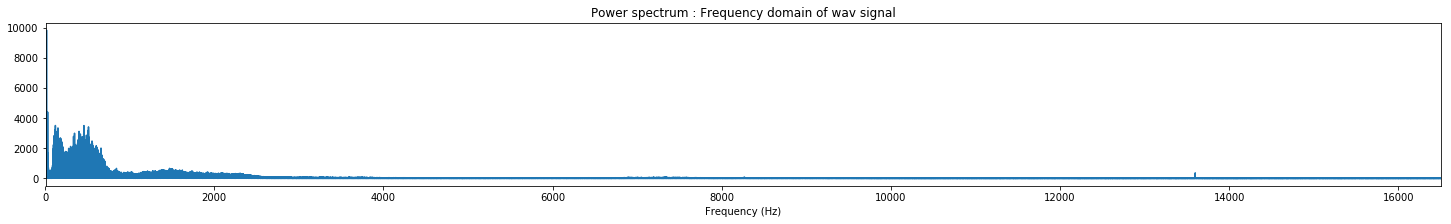

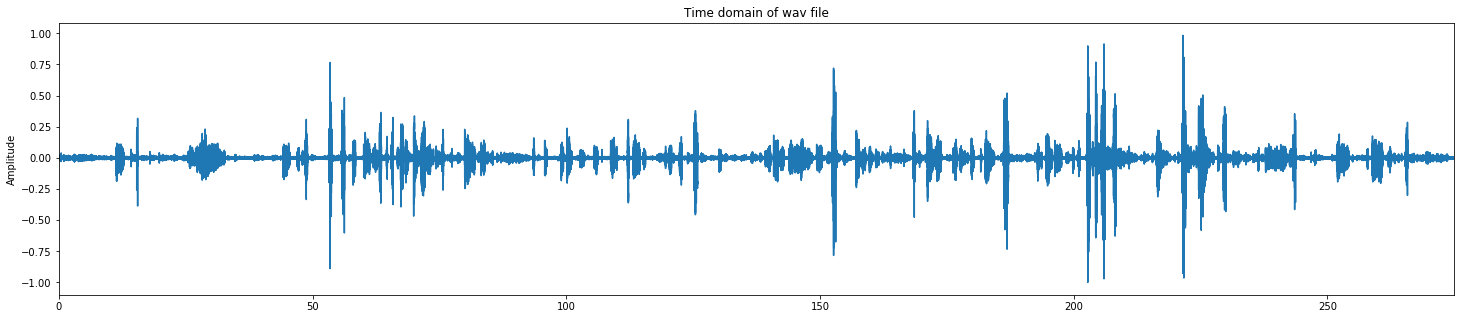

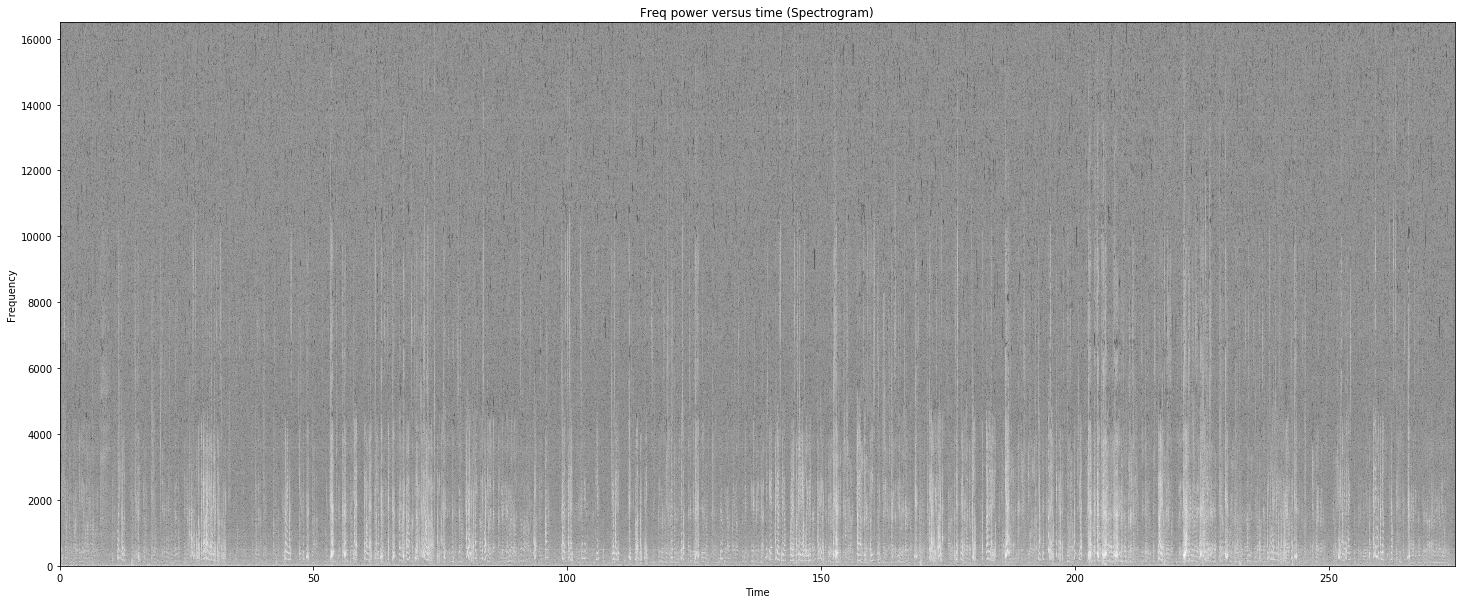

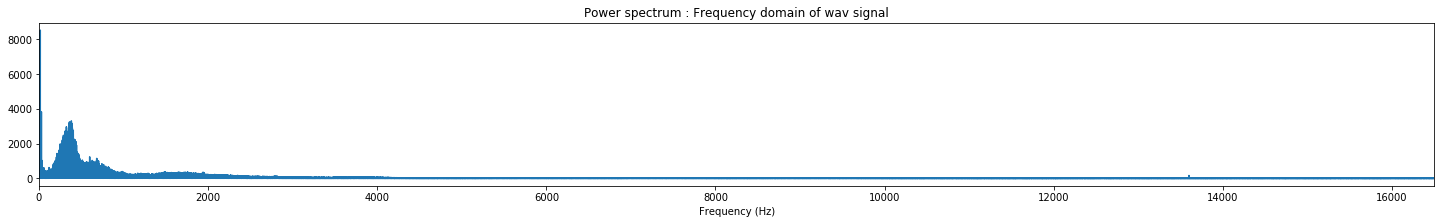

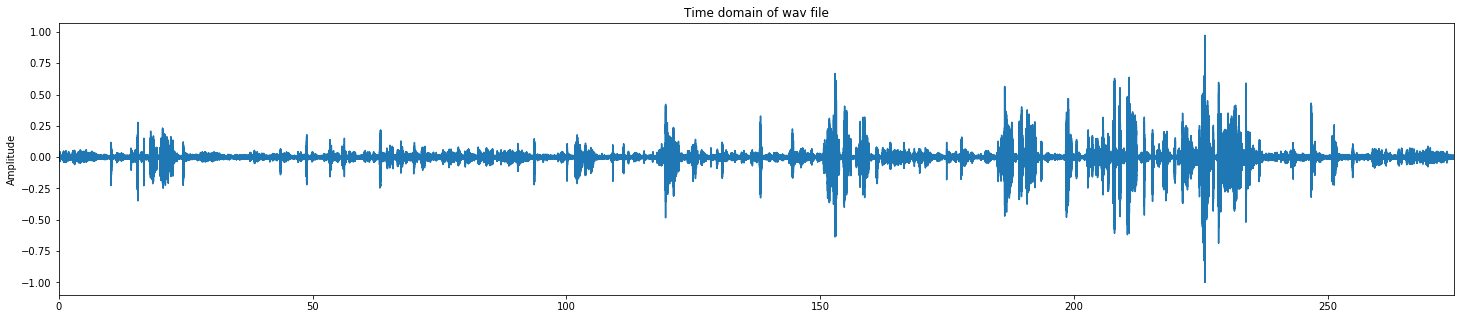

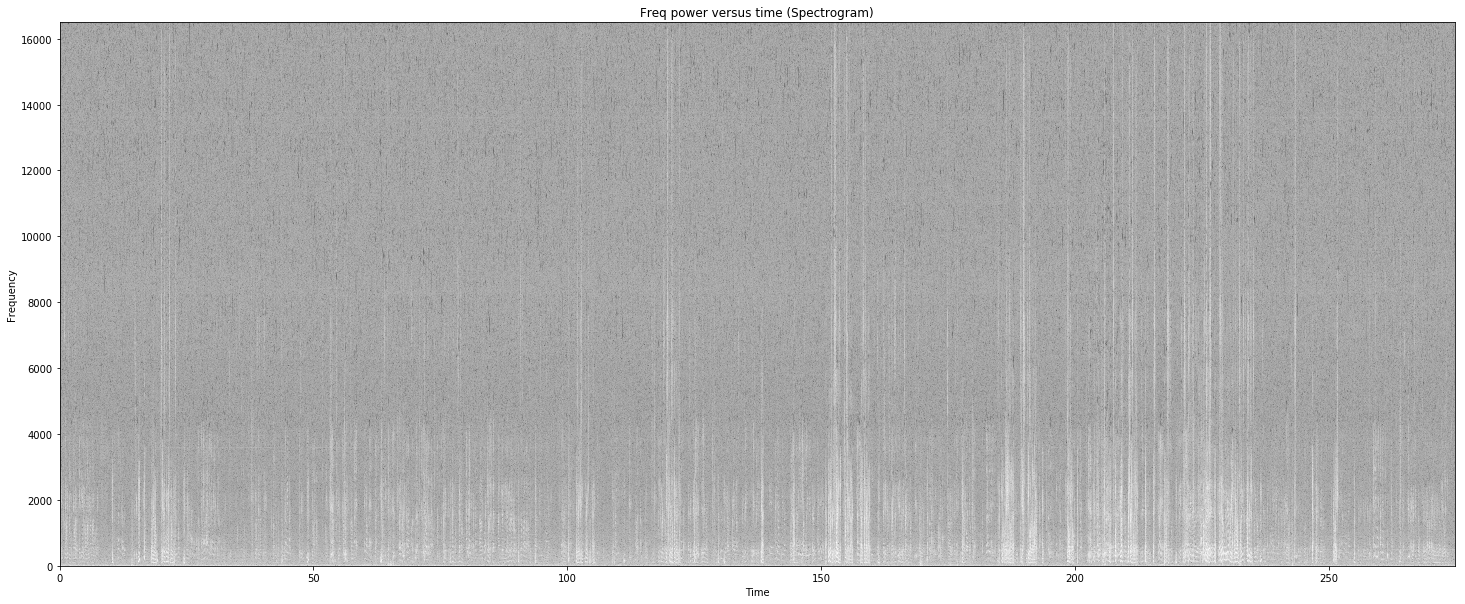

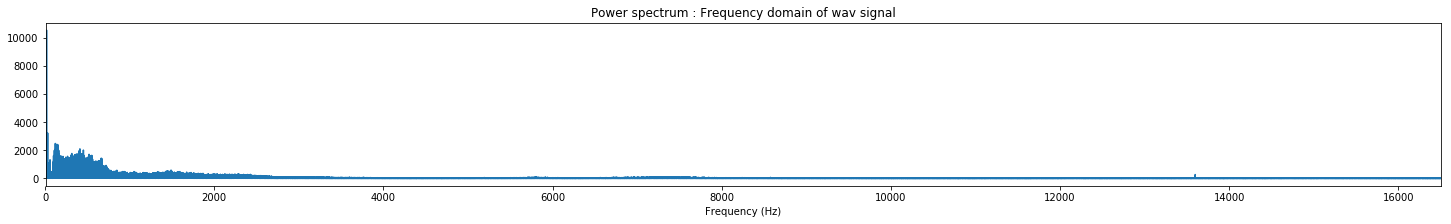

In [6]:
for w in wav_list:
    # samplerate, signalData = wavfile.read(data_loc+'vid_101__day_3__con_1__person_1_pulse.wav')
    wav = audio.norm_center_clip(w.sum(axis=1))

    # Plot the signal read from wav file
    plt.figure(figsize=(25,5))
    plt.title('Time domain of wav file')
    plt.plot(np.arange(len(wav)) / float(samplerate), wav)
    plt.ylabel('Amplitude') 
    plt.xlim(0, len(wav) / float(samplerate))
    plt.show()
    
    # Spectrogram
    plt.figure(figsize=(25,10))
    spectrum, freqs, times, im = plt.specgram(wav, Fs=samplerate, NFFT = 8192, scale = 'dB', cmap='gray') # scale = 'linear'
    plt.xlabel('Time')
    plt.ylabel('Frequency')
#     plt.xlim(2.5, 4)
    plt.ylim(5, 16500)
    plt.title('Freq power versus time (Spectrogram)')
    plt.show()
    
    # Power spectrum (Frequency domain only)
    plt.figure(figsize=(25,3))
    spectre = np.fft.fft(wav)
    freq = np.fft.fftfreq(len(wav), 1./samplerate)
    mask = freq > 0   
    plt.plot(freq[mask], np.abs(spectre[mask]))
    plt.xlim(5, 16500)
    plt.xlabel('Frequency (Hz)')
    plt.title('Power spectrum : Frequency domain of wav signal')
